In [7]:
%matplotlib inline

from collections import defaultdict, Counter
import glob
import os

from IPython.core.display import HTML, Image
from matplotlib_venn import venn3
import pandas as pd
import pybedtools
import pysam
import seaborn as sns
from scipy.stats import ttest_ind

from gscripts.general import parsers

In [2]:
analysis_dir = "/nas3/gpratt/projects/fet_family/analysis/sALS_v1/"
fet_clip = parsers.rnaseq_metrics(analysis_dir)

fet_clip["Reads After Triming"] = fet_clip['Input Reads'] - fet_clip['Too short reads']

filtered_guttman_clip = fet_clip[[ "Input Reads",
                            "Reads After Triming",
                            "Uniquely Mapped Reads",
                            "Uniquely mapped reads %",
                            
                            ]]

HTML(filtered_guttman_clip.to_html(formatters={"Input Reads" : parsers.commas,
                                     "Reads After Triming" : parsers.commas,
                                     "Reads after Quality Filtering" : parsers.commas,
                                     "Uniquely Mapped Reads" : parsers.commas,
                                     "Usable Reads" : parsers.commas,
                                     "Num Peaks": parsers.commas
                                     } ))

,Input Reads,Reads After Triming,Uniquely Mapped Reads,Uniquely mapped reads %
ssRNAseq_10C,"21,117,915","21,085,365","13,233,053",74.14%
ssRNAseq_16A,"30,899,786","30,792,020","22,068,975",76.94%
ssRNAseq_21A,"34,754,975","34,683,514","26,240,838",78.86%
ssRNAseq_27A,"26,241,715","26,191,968","19,179,761",77.14%
ssRNAseq_34A,"32,978,331","32,739,371","22,715,617",73.52%
ssRNAseq_39C,"35,390,202","35,303,987","25,683,146",78.26%
ssRNAseq_42C,"35,156,338","35,083,085","25,455,668",76.76%
ssRNAseq_44C,"30,616,734","30,553,034","21,270,422",74.15%
ssRNAseq_48A,"11,632,246","11,572,875","7,977,639",75.02%
ssRNAseq_60A,"30,508,179","30,443,215","22,708,506",78.89%


#From Ron's RPKMs get the actual values

In [36]:
annotations = "60a	62a	63a	84a	89a	21a	34a	79a	82a	16a	27a	48a	85a	10c	65c	78c	39c	67c	76c	42c	44c	88c"
values = "-3.814658309	-3.626739883	-3.695991937	-2.83743096	-1.4892684	-4.224995833	-3.046472684	-4.148113022	-1.42487332	-3.617667053	-1.822375861	-0.68667834	0	-3.051376839	-3.942092815	-3.666000261	-4.008879741	-3.664231177	-3.886660831	-3.149979542	-3.3243866	-2.963962328"

In [37]:
scores = dict(zip(annotations.split(), map(float, values.split())))
scores = pd.Series(scores)

new_index = []
for index in scores.index:
    exp = "Control" if index[-1:] == "c" else "Disease"
    new_index.append([index[:-1], exp])

scores.index = pd.MultiIndex.from_tuples(new_index, names=['id', 'exp'])
scores = pd.DataFrame(scores, columns=['rpkm'])


In [38]:
scores['exp'] = scores.index.get_level_values(level='exp')
scores['id'] = scores.index.get_level_values(level='id')

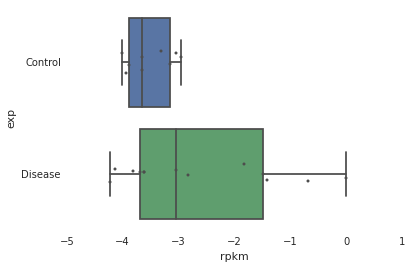

In [39]:
ax = sns.boxplot(x='rpkm', y='exp', data=scores)
sns.stripplot(x='rpkm', y='exp', data=scores,
              jitter=True, size=3, color=".3", linewidth=0)

In [41]:
ctrl, disease = list(scores.groupby("exp"))
ttest_ind(ctrl[1].rpkm, disease[1].rpkm)

Ttest_indResult(statistic=-1.7929213770446888, pvalue=0.088124275073685657)

#filer out strange samples

In [ ]:
filtered_scores = scores[~scores.id.isin('21 79 42 44'.split())]


In [45]:
scores[scores.id.isin('21 79 42 44'.split())]

,,rpkm,exp,id
id,exp,,,
21,Disease,-4.224996,Disease,21
42,Control,-3.149980,Control,42
44,Control,-3.324387,Control,44
79,Disease,-4.148113,Disease,79


In [50]:
scores

,,rpkm,exp,id
id,exp,,,
10,Control,-3.051377,Control,10
16,Disease,-3.617667,Disease,16
21,Disease,-4.224996,Disease,21
27,Disease,-1.822376,Disease,27
34,Disease,-3.046473,Disease,34
39,Control,-4.008880,Control,39
42,Control,-3.149980,Control,42
44,Control,-3.324387,Control,44
48,Disease,-0.686678,Disease,48


In [49]:
scores.groupby("exp").mean()

,rpkm
exp,
Control,-3.517508
Disease,-2.648867


In [48]:
scores[~scores.id.isin('21 79 42 44'.split())].groupby("exp").mean()

,rpkm
exp,
Control,-3.597601
Disease,-2.369287


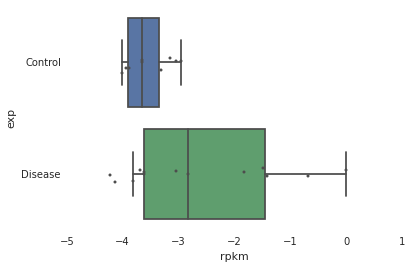

In [44]:
filtered_scores = scores[~scores.id.isin('21 79 42 44'.split())]

ax = sns.boxplot(x='rpkm', y='exp', data=filtered_scores)
sns.stripplot(x='rpkm', y='exp', data=scores,
              jitter=True, size=3, color=".3", linewidth=0)

In [43]:
ctrl, disease = list(filtered_scores.groupby("exp"))
ttest_ind(ctrl[1].rpkm, disease[1].rpkm)

Ttest_indResult(statistic=-2.3217372627013635, pvalue=0.033768993430172381)